Загрузить файл hr.csv (можно найти во сложении к заданию)
1. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
2. Рассчитать и визуализировать корреляционную матрицу для переменных
3. Визуализировать несколько взаимосвязей между переменными
3. С использованием t-test статистики проверить взаимосвязи между несколькими выборками (двумя или больше)
4. Рассчитать сколько работников работает в каждом департаменте
5. Показать распределение сотрудников по зарплатам
6. Показать распределение сотрудников по зарплатам совместно с департаментами
7. Сколько сотрудников покинули компанию
8. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию
9. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [59]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


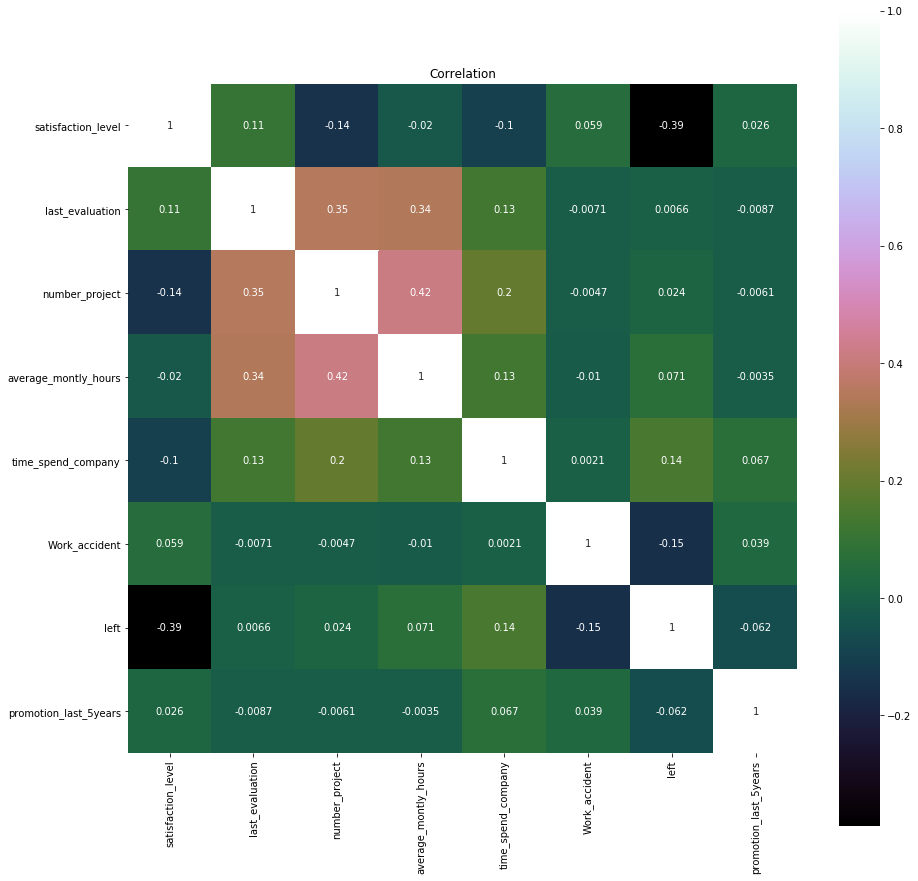

In [11]:
correlation = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation')
plt.show()

In [64]:
df_employee_for_departament = df[['sales', 'left']].copy()
df_employee_for_departament['left'] = df_employee_for_departament['left'].astype(str)
df_employee_for_departament = df_employee_for_departament[df_employee_for_departament.left.str.contains('1', case=False)==False]
df_employee_for_departament = df_employee_for_departament.groupby(['sales']).count().reset_index()[['sales', 'left']].sort_values('sales', ascending=False).reset_index(drop=True)
df_employee_for_departament

,sales,left
0,technical,2023
1,support,1674
2,sales,3126
3,product_mng,704
4,marketing,655
5,management,539
6,hr,524
7,accounting,563
8,RandD,666
9,IT,954


In [66]:
df_dismiss = df[['sales', 'left']].copy()
df_dismiss['left'] = df_dismiss['left'].astype(str)
df_dismiss = df_dismiss[df_dismiss.left.str.contains('1', case=False)==True]
df_dismiss = df_dismiss.groupby(['left']).count().reset_index()[['left', 'sales']].sort_values('left', ascending=False).reset_index(drop=True)
df_dismiss['sales'][0]

3571